
<div style="text-align: center;margin-left: -5%;  font-size: 35px;">
    <b>PRCP-1002-Handwritten Digits Recognition</b>
</div>

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK-1 : Prepare a complete data analysis report on the given data</b>
</div>

### 1) Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import layers, models
import seaborn as sns


### 2) Loading Dataset

In [2]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


### 3) Data Evaluation

In [3]:
all_images = np.concatenate((x_train, x_test))
all_labels = np.concatenate((y_train, y_test))
print("Unique labels in all_labels:", np.unique(all_labels))
print("Shape of all_labels:", all_labels.shape)

Unique labels in all_labels: [0 1 2 3 4 5 6 7 8 9]
Shape of all_labels: (70000,)


In [4]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Unique labels in y_train:", np.unique(y_train))


y_train shape: (60000,)
y_test shape: (10000,)
Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


### 4) Visualization of the data

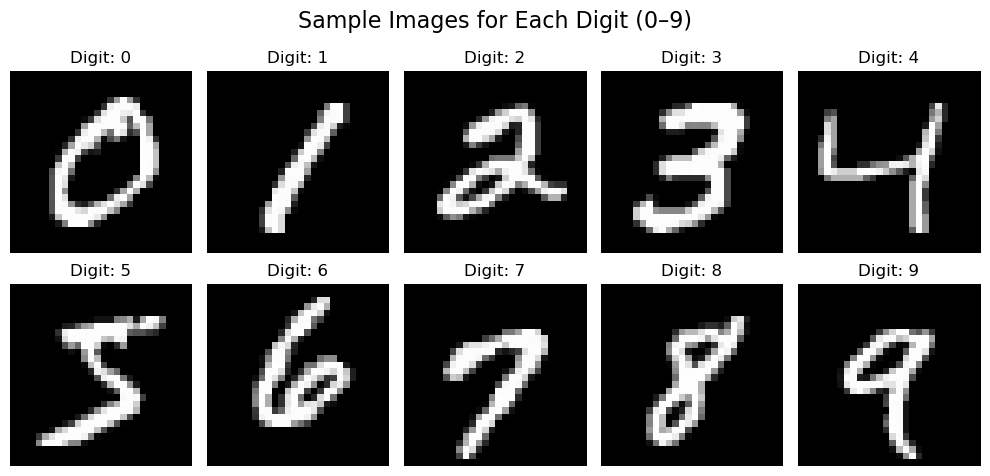

In [38]:
sample_images = []
for digit in range(10):
    idx = np.where(all_labels == digit)[0][0] 
    sample_images.append(all_images[idx])

plt.figure(figsize=(10, 5))
for i, img in enumerate(sample_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')

plt.suptitle("Sample Images for Each Digit (0–9)", fontsize=16)
plt.tight_layout()
plt.show()

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK-2: Classifying the handwritten digit from 0 to 9 using bar chart </b>
</div>

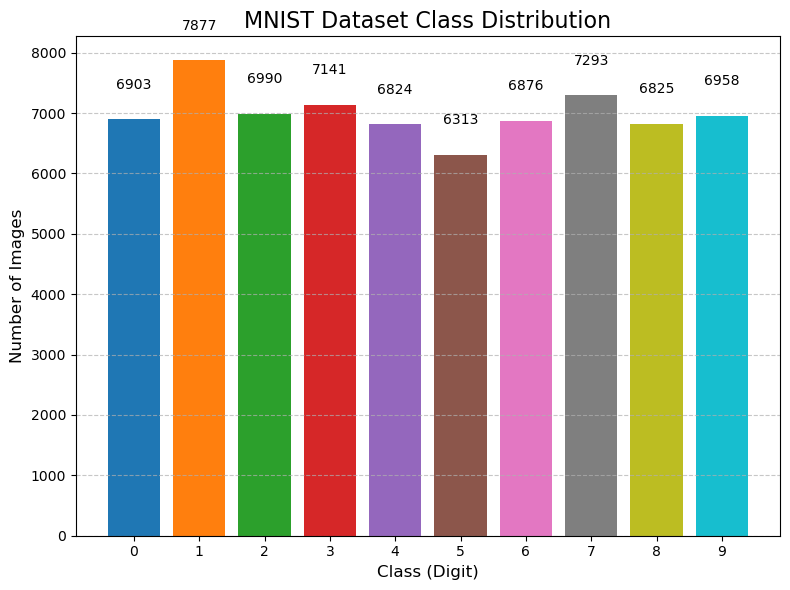

In [40]:
all_labels = np.concatenate((y_train, y_test))
class_counts = np.bincount(all_labels, minlength=10)
plt.figure(figsize=(8, 6))
bars = plt.bar(range(10), class_counts, color=plt.cm.tab10.colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, str(yval), ha='center', fontsize=10)
plt.title("MNIST Dataset Class Distribution", fontsize=16)
plt.xlabel("Class (Digit)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(range(10), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK-3: Comparison between various models </b>
</div>

### 1. SVM (Support Vector Machine)
###   2. KNN (K-Nearest Neighbors)
###     3. CNN (Convolutional Neural Network)

### **1) Model building using ***SVM*****

### Data Preprocessing

In [6]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)  
x_test_flat = x_test.reshape(x_test.shape[0], -1)   

x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)


In [44]:

svm_model = SVC(kernel='rbf', C=10, gamma=0.01)  
print("Training the SVM model...")
svm_model.fit(x_train_flat, y_train)
y_pred = svm_model.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training the SVM model...
Test Accuracy: 86.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       980
           1       0.99      0.98      0.99      1135
           2       0.47      0.99      0.63      1032
           3       0.97      0.80      0.88      1010
           4       0.98      0.85      0.91       982
           5       0.97      0.82      0.89       892
           6       0.99      0.79      0.88       958
           7       0.97      0.83      0.90      1028
           8       0.97      0.84      0.90       974
           9       0.97      0.87      0.92      1009

    accuracy                           0.87     10000
   macro avg       0.93      0.86      0.88     10000
weighted avg       0.93      0.87      0.88     10000



### **Accuracy of SVM : 87%**

### Confusion Matrix

<Figure size 1000x800 with 0 Axes>

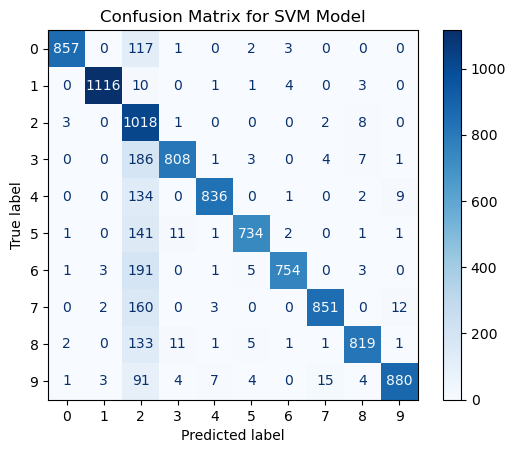

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix for SVM Model")
plt.show()

### Classification Report

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       980
           1       0.99      0.98      0.99      1135
           2       0.47      0.99      0.63      1032
           3       0.97      0.80      0.88      1010
           4       0.98      0.85      0.91       982
           5       0.97      0.82      0.89       892
           6       0.99      0.79      0.88       958
           7       0.97      0.83      0.90      1028
           8       0.97      0.84      0.90       974
           9       0.97      0.87      0.92      1009

    accuracy                           0.87     10000
   macro avg       0.93      0.86      0.88     10000
weighted avg       0.93      0.87      0.88     10000



### Visualizing predictions with images

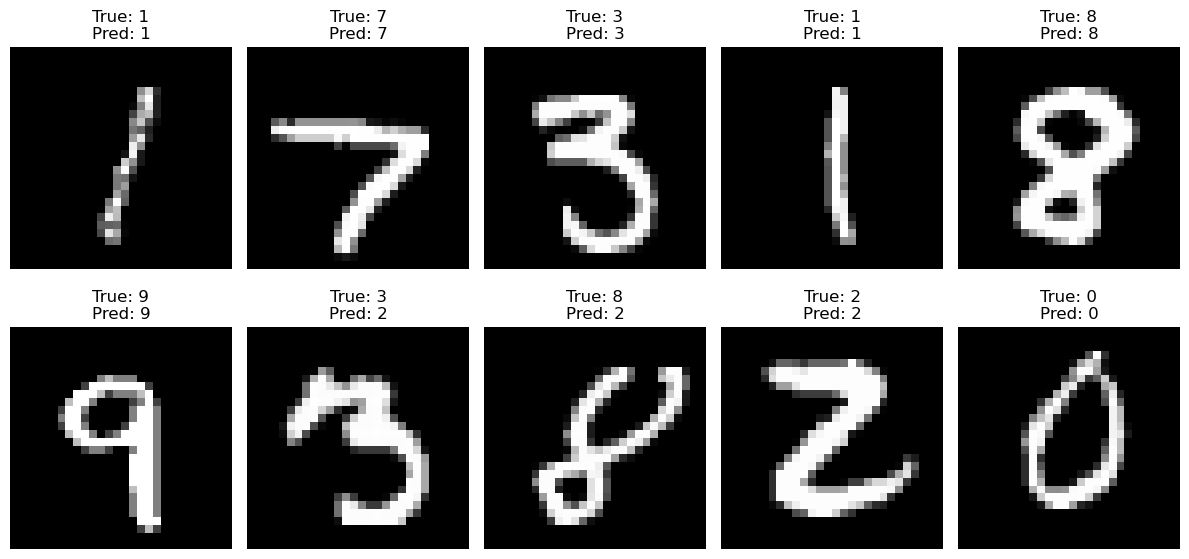

In [50]:

def display_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
display_predictions(x_test, y_test, y_pred, num_samples=10)


### **2) Model building using ***KNN*****

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(x_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy on MNIST test set using KNN: {accuracy * 100:.2f}%")

Accuracy on MNIST test set using KNN: 94.52%


### **Accuracy of KNN : 95%**

### Confusion Matrix

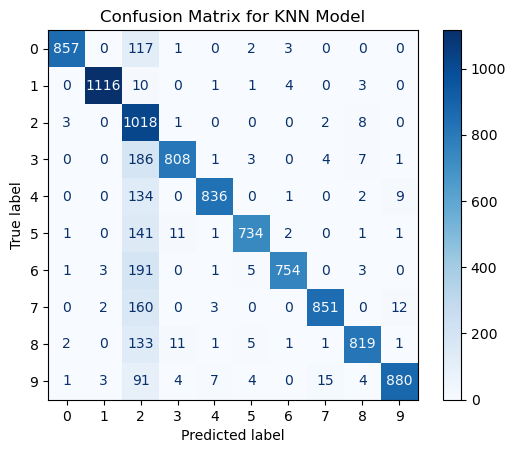

In [54]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Model")
plt.show()

### Classification Report

In [54]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



### Visualizing predictions with images

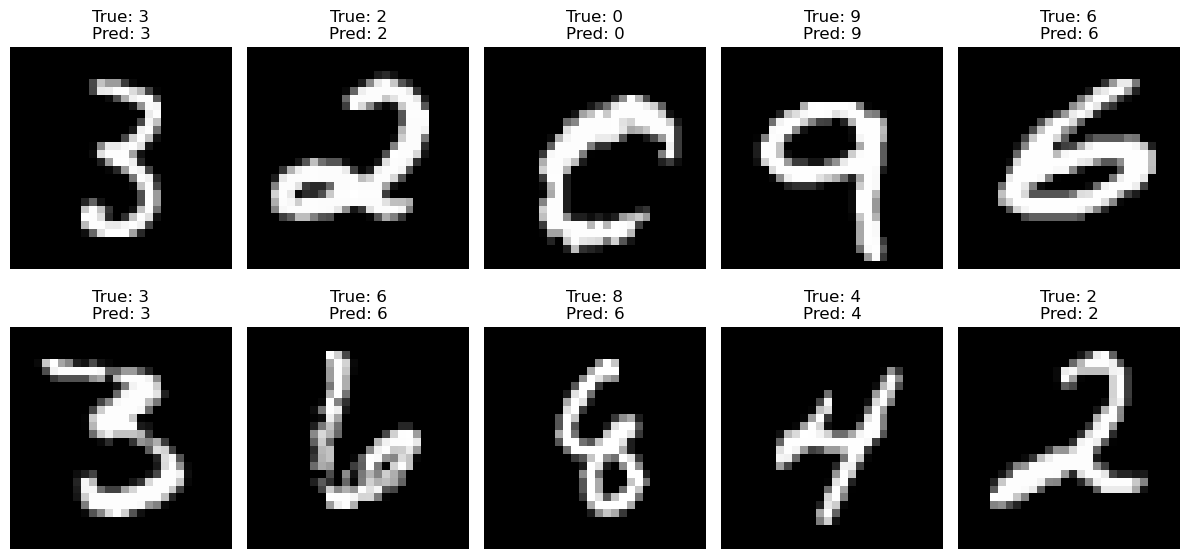

In [8]:
def display_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
display_predictions(x_test, y_test, y_pred_knn, num_samples=10)



### **3) Model building using ***CNN*****

### Data Preprocessing

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)



Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 20s - 27ms/step - accuracy: 0.9347 - loss: 0.2140 - val_accuracy: 0.9742 - val_loss: 0.0843
Epoch 2/10
750/750 - 15s - 20ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.9864 - val_loss: 0.0474
Epoch 3/10
750/750 - 18s - 24ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9862 - val_loss: 0.0470
Epoch 4/10
750/750 - 18s - 23ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 5/10
750/750 - 15s - 20ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 6/10
750/750 - 18s - 25ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9890 - val_loss: 0.0399
Epoch 7/10
750/750 - 17s - 22ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9854 - val_loss: 0.0514
Epoch 8/10
750/750 - 21s - 27ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 9/10
750/750 - 16s - 21ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9893 - val_loss: 0

### **Accuracy of CNN : 99%**

### Confusion Matrix


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


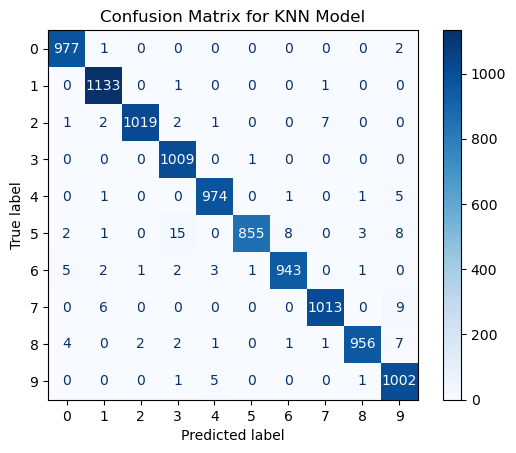

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(x_test) 
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Model")
plt.show()

### Classification Report

In [71]:
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Plotting Accuracy/Loss curves

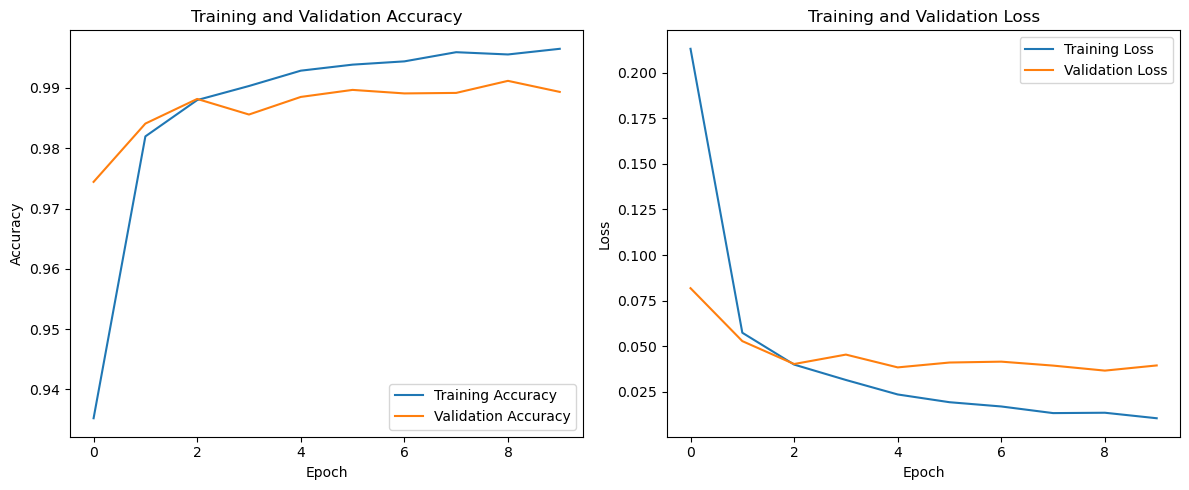

In [85]:

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_training_history(history)


### Visualizing predictions with images

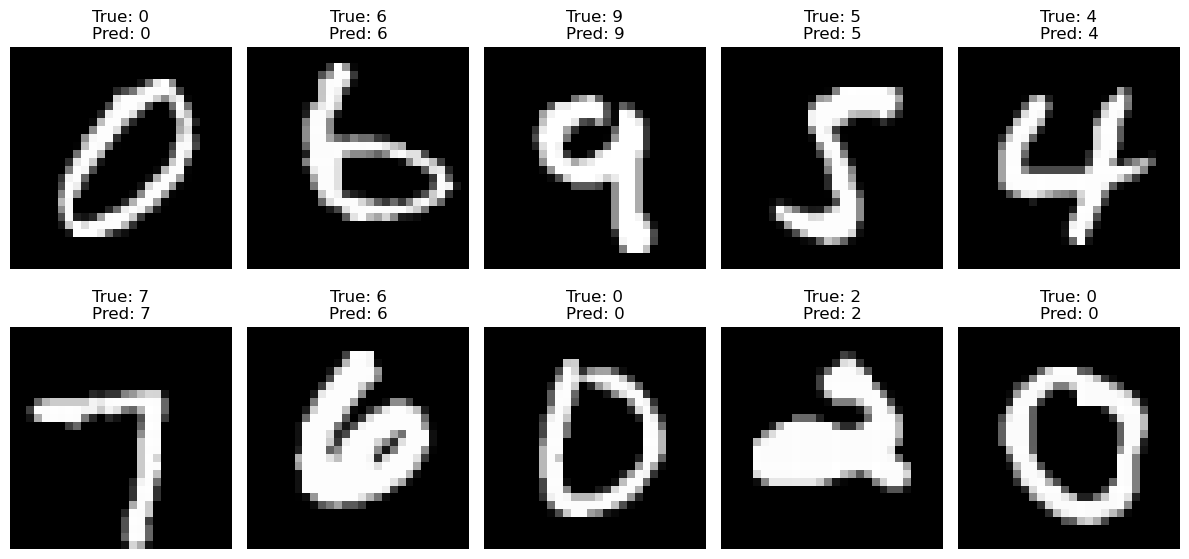

In [18]:
def display_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
display_predictions(x_test, y_true, y_pred, num_samples=10)

## **Conclusion :**


####   ● **MODEL-1 : SVM (Support Vector Machine)**

   #### It gives Accuracy of **87%** ,High time complextity on large dataset.

#### ● **MODEL-2 : KNN (KNN(K-Nearest Neighbors)**

   #### It gives Accuracy of-**95%** ,More effective for Small Dataset.
        
#### ● **MODEL-3 : CNN (Convolutional Neural Network)**

   #### It gives Accuracy of-**99%** ,CNN performs the best in terms of accuracy and generalization for image data.


###  The **"CNN Model"** is Highly Recommended for its high performance and less time computation.

##  **Challenges :**

####   ●  Due to the simplicity of the MNIST dataset, complex models like CNN can easily overfit.

####   ●  SVM Model Building takes more time.

####   ●  Low image resolution.

####   ●  The pixel values cannot be properly scaled or mapped for display.
  